#Imports

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import acf, pacf


In [ ]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# Link Quality from Memoryless Distribution

In [ ]:
t = np.arange(0, 360)


In [ ]:
path1 = np.random.normal(loc=15, scale=1, size=len(t))
path2 = np.random.normal(loc=10, scale=2, size=len(t))


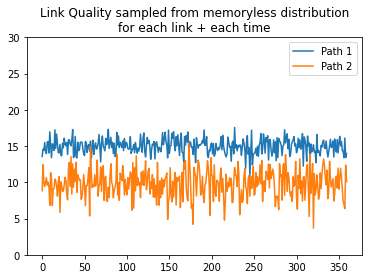

In [ ]:
sns.lineplot(x=t, y=path1, label='Path 1');
sns.lineplot(x=t, y=path2, label='Path 2');
plt.ylim(0, 30);
plt.title("Link Quality sampled from memoryless distribution\nfor each link + each time");

# Link Quality from Real Independent Traces

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/NYU-METS/Main/master/Sample_Traces/bus57.csv', names=['Value', 'Units'])
pd.value_counts(df['Units'])
df['Multiplier'] = df['Units'].map({'Mbits/sec': 1e6, 'Kbits/sec': 1e3, 'bits/sec': 1})
df['Mbps'] = df['Value']*df['Multiplier']/1e6
path1 = np.array(df['Mbps'])[:360]


In [ ]:
 df = pd.read_csv('https://raw.githubusercontent.com/NYU-METS/Main/master/Sample_Traces/QTrain.csv', names=['Value', 'Units'])
pd.value_counts(df['Units'])
df['Multiplier'] = df['Units'].map({'Mbits/sec': 1e6, 'Kbits/sec': 1e3, 'bits/sec': 1})
df['Mbps'] = df['Value']*df['Multiplier']/1e6
path2 = np.array(df['Mbps'])[:360]

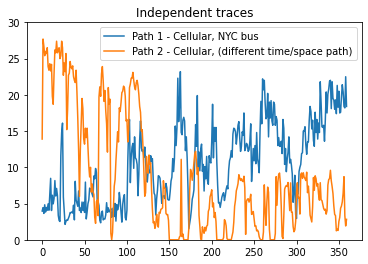

In [ ]:
sns.lineplot(x=t, y=path1, label='Path 1 - Cellular, NYC bus');
sns.lineplot(x=t, y=path2, label='Path 2 - Cellular, (different time/space path)');
plt.ylim(0, 30);
plt.title("Independent traces");

#Link Quality from Real Trace Pairs

## Load in all data: for seaborn facetgrid

SBU: Stony Brook University

* path 7: at SBU walk SAC side door to the bus stop (WiFi should get weaker)
* path 8: SBU library walk from Central Reading Room to outside by the side door towards Stellar center (WiFi should get weaker)
* path 11: SBU East side Dining Hall indoor walk from Pizza V. to Tool Rd Deli (WiFi can vary or not)
* path 12: SBU outdoor bench across Psych A bldg to indoors library right outside central reading room (WiFi should get stronger)

In [ ]:
dfx = pd.DataFrame(None) # this is where all the traces from all paths and trials will be collected

In [ ]:
# configure data location, path 7
config="2021-08-03-16:15:28.pcap-PROCESSED"
csvFolder='http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/'+ config+ '/' #use ending /


csvFiles=['2__1628021915.734065000__172.58.227.147__57472__199.109.64.50__80.pcap.csv', # 2__ and 4__ is for trial1
		      '4__1628021929.021405000__192.42.55.21__39728__199.109.64.50__80.pcap.csv',
					'8__1628022118.876242000__172.58.227.147__59194__199.109.64.50__80.pcap.csv',
					'9__1628022141.564395000__192.42.55.21__2709__199.109.64.50__80.pcap.csv',
					'11__1628022353.871282000__172.58.227.147__47103__199.109.64.50__80.pcap.csv',
					'13__1628022372.892744000__192.42.55.21__29410__199.109.64.50__80.pcap.csv',
					'16__1628022659.462398000__172.58.227.147__44546__199.109.64.50__80.pcap.csv',
					'17__1628022665.399316000__192.42.55.21__16310__199.109.64.50__80.pcap.csv',
					'19__1628022927.067215000__172.58.227.147__30704__199.109.64.50__80.pcap.csv',
					'22__1628022931.222630000__192.42.55.21__23419__199.109.64.50__80.pcap.csv']

networkFiles=['cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi']
pathFiles =[ 7,7,7,7,7,7,7,7,7,7]
trialFiles =[1,1,2,2,3,3,4,4,5,5]

In [ ]:
dfxt = pd.DataFrame(None)

for i in range(len(csvFiles)):
  csvFileFull = csvFolder+csvFiles[i] # cell link
  print(csvFileFull)
  dfxt = pd.read_csv(csvFileFull, header=None)
  dfxt.columns=['time','Bps']

  dfxt['network']=networkFiles[i]
  dfxt['path']=pathFiles[i]
  dfxt['trial']=trialFiles[i]

  dfx=pd.concat([dfx, dfxt[0:100] ], axis=0)
  dfx['Mbps']=(8/10**6)* dfx['Bps']

dfx

http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-03-16:15:28.pcap-PROCESSED/2__1628021915.734065000__172.58.227.147__57472__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-03-16:15:28.pcap-PROCESSED/4__1628021929.021405000__192.42.55.21__39728__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-03-16:15:28.pcap-PROCESSED/8__1628022118.876242000__172.58.227.147__59194__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-03-16:15:28.pcap-PROCESSED/9__1628022141.564395000__192.42.55.21__2709__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-03-16:15:28.pcap-PROCESSED/11__1628022353.871282000__172.58.227.147__47103__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-ne

time      Bps   network  path  trial       Mbps
0      1  2459130  cellular     7      1  19.673040
1      2  4547534  cellular     7      1  36.380272
2      3  8087024  cellular     7      1  64.696192
3      4  9932444  cellular     7      1  79.459552
4      5  7808374  cellular     7      1  62.466992
..   ...      ...       ...   ...    ...        ...
95    96  4467672      wifi     7      5  35.741376
96    97  4477986      wifi     7      5  35.823888
97    98  3429234      wifi     7      5  27.433872
98    99  4201920      wifi     7      5  33.615360
99   100  2349054      wifi     7      5  18.792432

[1000 rows x 6 columns]

In [ ]:
# configure data location, path 8
config="2021-08-04-14:26:18.pcap-PROCESSED"
csvFolder='http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/'+ config+ '/' #use ending /

csvFiles=['2__1628101769.339937000__172.58.227.128__46089__199.109.64.50__80.pcap.csv',
		'3__1628101773.918253000__192.42.55.21__23458__199.109.64.50__80.pcap.csv',
		'4__1628101983.443023000__172.58.227.128__39267__199.109.64.50__80.pcap.csv',
		'5__1628101988.201742000__192.42.55.21__33969__199.109.64.50__80.pcap.csv',
		'6__1628102204.796313000__172.58.227.128__53683__199.109.64.50__80.pcap.csv',
		'7__1628102209.068759000__192.42.55.21__35357__199.109.64.50__80.pcap.csv',
		'10__1628102421.639078000__172.58.227.128__44341__199.109.64.50__80.pcap.csv',
		'11__1628102426.234715000__192.42.55.21__27539__199.109.64.50__80.pcap.csv',
		'12__1628102741.167960000__172.58.227.128__56476__199.109.64.50__80.pcap.csv',
		'13__1628102744.579495000__192.42.55.21__25540__199.109.64.50__80.pcap.csv']

networkFiles=['cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi']
pathFiles =[8,8,8,8,8,8,8,8,8,8]
trialFiles =[1,1,2,2,3,3,4,4,5,5]

In [ ]:
dfxt = pd.DataFrame(None)

for i in range(len(csvFiles)):
  csvFileFull = csvFolder+csvFiles[i] # cell link
  print(csvFileFull)
  dfxt = pd.read_csv(csvFileFull, header=None)
  dfxt.columns=['time','Bps']

  dfxt['network']=networkFiles[i]
  dfxt['path']=pathFiles[i]
  dfxt['trial']=trialFiles[i]

  dfx=pd.concat([dfx, dfxt[0:100] ], axis=0)
  dfx['Mbps']=(8/10**6)* dfx['Bps']

dfx

http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-04-14:26:18.pcap-PROCESSED/2__1628101769.339937000__172.58.227.128__46089__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-04-14:26:18.pcap-PROCESSED/3__1628101773.918253000__192.42.55.21__23458__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-04-14:26:18.pcap-PROCESSED/4__1628101983.443023000__172.58.227.128__39267__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-04-14:26:18.pcap-PROCESSED/5__1628101988.201742000__192.42.55.21__33969__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-04-14:26:18.pcap-PROCESSED/6__1628102204.796313000__172.58.227.128__53683__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-ne

time      Bps   network  path  trial       Mbps
0      1  2459130  cellular     7      1  19.673040
1      2  4547534  cellular     7      1  36.380272
2      3  8087024  cellular     7      1  64.696192
3      4  9932444  cellular     7      1  79.459552
4      5  7808374  cellular     7      1  62.466992
..   ...      ...       ...   ...    ...        ...
95    96        0      wifi     8      5   0.000000
96    97        0      wifi     8      5   0.000000
97    98        0      wifi     8      5   0.000000
98    99        0      wifi     8      5   0.000000
99   100  2628480      wifi     8      5  21.027840

[1992 rows x 6 columns]

In [ ]:
# configure data location, path 11
config="2021-08-11-16:40:01.pcap-PROCESSED"
csvFolder='http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/'+ config+ '/' #use ending /


csvFiles=['4__1628714731.146211000__172.58.230.250__46064__199.109.64.50__80.pcap.csv',
		'5__1628714735.827463000__192.42.55.22__2342__199.109.64.50__80.pcap.csv',
		'7__1628714994.446249000__172.58.230.250__55982__199.109.64.50__80.pcap.csv',
		'8__1628714999.759233000__192.42.55.22__28214__199.109.64.50__80.pcap.csv',
		'9__1628715250.735406000__172.58.230.250__22557__199.109.64.50__80.pcap.csv',
		'10__1628715254.875998000__192.42.55.22__40196__199.109.64.50__80.pcap.csv',
		'11__1628715468.417467000__172.58.230.250__51346__199.109.64.50__80.pcap.csv',
		'12__1628715474.515628000__192.42.55.22__18741__199.109.64.50__80.pcap.csv',
		'13__1628715715.550477000__172.58.230.250__57883__199.109.64.50__80.pcap.csv',
		'14__1628715719.393161000__192.42.55.22__26300__199.109.64.50__80.pcap.csv']

networkFiles=['cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi']
pathFiles =[11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
trialFiles =[1,1,2,2,3,3,4,4,5,5]

In [ ]:
dfxt = pd.DataFrame(None)

for i in range(len(csvFiles)):
  csvFileFull = csvFolder+csvFiles[i] # cell link
  print(csvFileFull)
  dfxt = pd.read_csv(csvFileFull, header=None)
  dfxt.columns=['time','Bps']

  dfxt['network']=networkFiles[i]
  dfxt['path']=pathFiles[i]
  dfxt['trial']=trialFiles[i]

  dfx=pd.concat([dfx, dfxt[0:100] ], axis=0)
  dfx['Mbps']=(8/10**6)* dfx['Bps']

dfx

http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-16:40:01.pcap-PROCESSED/4__1628714731.146211000__172.58.230.250__46064__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-16:40:01.pcap-PROCESSED/5__1628714735.827463000__192.42.55.22__2342__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-16:40:01.pcap-PROCESSED/7__1628714994.446249000__172.58.230.250__55982__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-16:40:01.pcap-PROCESSED/8__1628714999.759233000__192.42.55.22__28214__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-16:40:01.pcap-PROCESSED/9__1628715250.735406000__172.58.230.250__22557__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net

time      Bps   network  path  trial       Mbps
0      1  2459130  cellular     7      1  19.673040
1      2  4547534  cellular     7      1  36.380272
2      3  8087024  cellular     7      1  64.696192
3      4  9932444  cellular     7      1  79.459552
4      5  7808374  cellular     7      1  62.466992
..   ...      ...       ...   ...    ...        ...
95    96  2189772      wifi    11      5  17.518176
96    97  2224944      wifi    11      5  17.799552
97    98  4304322      wifi    11      5  34.434576
98    99  6558930      wifi    11      5  52.471440
99   100  6607962      wifi    11      5  52.863696

[2992 rows x 6 columns]

In [ ]:
# configure data location, path 12
config="2021-08-11-17:55:46.pcap-PROCESSED"
csvFolder='http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/'+ config+ '/' #use ending /

csvFiles=['2__1628719235.540466000__172.58.230.250__41498__199.109.64.50__80.pcap.csv',
           '3__1628719238.303378000__192.42.55.21__7615__199.109.64.50__80.pcap.csv',
           '6__1628719479.679511000__172.58.230.250__33254__199.109.64.50__80.pcap.csv',
           '7__1628719485.040226000__192.42.55.21__13503__199.109.64.50__80.pcap.csv',
           '13__1628719730.316961000__172.58.230.250__57024__199.109.64.50__80.pcap.csv',
           '14__1628719735.618988000__192.42.55.21__29330__199.109.64.50__80.pcap.csv']

networkFiles=['cellular', 'wifi', 'cellular', 'wifi', 'cellular', 'wifi']
pathFiles =[12, 12, 12, 12, 12, 12]
trialFiles =[1,1,2,2,3,3]

In [ ]:
dfxt = pd.DataFrame(None)

for i in range(len(csvFiles)):
  csvFileFull = csvFolder+csvFiles[i] # cell link
  print(csvFileFull)
  dfxt = pd.read_csv(csvFileFull, header=None)
  dfxt.columns=['time','Bps']

  dfxt['network']=networkFiles[i]
  dfxt['path']=pathFiles[i]
  dfxt['trial']=trialFiles[i]

  dfx=pd.concat([dfx, dfxt[0:100] ], axis=0)
  dfx['Mbps']=(8/10**6)* dfx['Bps']

dfx

http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-17:55:46.pcap-PROCESSED/2__1628719235.540466000__172.58.230.250__41498__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-17:55:46.pcap-PROCESSED/3__1628719238.303378000__192.42.55.21__7615__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-17:55:46.pcap-PROCESSED/6__1628719479.679511000__172.58.230.250__33254__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-17:55:46.pcap-PROCESSED/7__1628719485.040226000__192.42.55.21__13503__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-17:55:46.pcap-PROCESSED/13__1628719730.316961000__172.58.230.250__57024__199.109.64.50__80.pcap.csv
http://webserver.webserver-aydini.ch-geni-ne

time      Bps   network  path  trial       Mbps
0      1  2459130  cellular     7      1  19.673040
1      2  4547534  cellular     7      1  36.380272
2      3  8087024  cellular     7      1  64.696192
3      4  9932444  cellular     7      1  79.459552
4      5  7808374  cellular     7      1  62.466992
..   ...      ...       ...   ...    ...        ...
95    96  2712024      wifi    12      3  21.696192
96    97  2848626      wifi    12      3  22.789008
97    98  2087010      wifi    12      3  16.696080
98    99  5532534      wifi    12      3  44.260272
99   100  5610762      wifi    12      3  44.886096

[3592 rows x 6 columns]

## Compute sum throughput 

In [ ]:
dfsum = dfx.groupby(['path', 'trial', 'time'], as_index=False).agg(Mbps=('Mbps', sum))
dfsum['network'] = 'sum'


dfmax = dfx.groupby(['path', 'trial', 'time'], as_index=False).agg(Mbps=('Mbps', max))
dfmax['network'] = 'max'

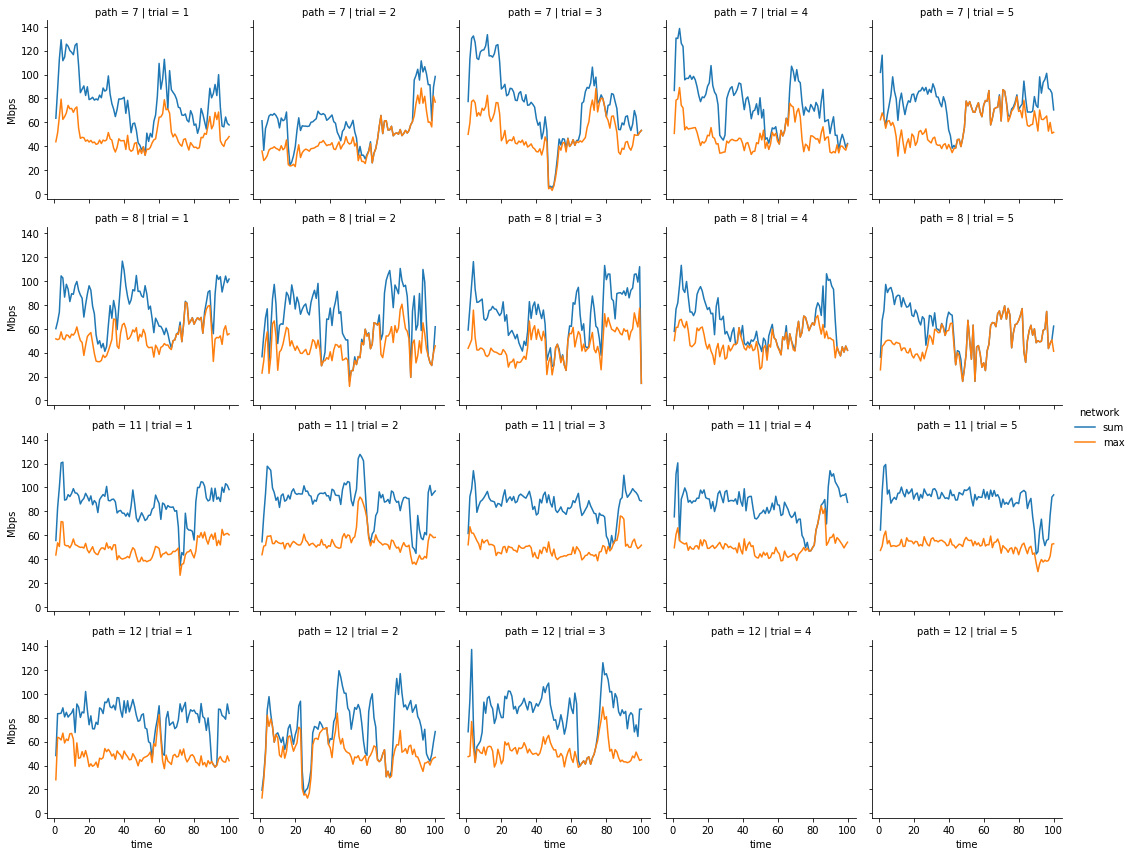

In [ ]:
#g=sns.FacetGrid(dfx, row='trial', col='path',hue="network")
g=sns.FacetGrid(pd.concat( [dfsum, dfmax]), row='path', col='trial',hue="network")
g.map(sns.lineplot,'time', 'Mbps')
g.add_legend()


In [ ]:
dfsingle = dfx[['path', 'trial', 'time', 'Mbps', 'network']]

In [ ]:
dfall = pd.concat( [dfsum, dfmax, dfsingle])

## Look at all data: as seaborn facetgrid

### throughput per path and trial

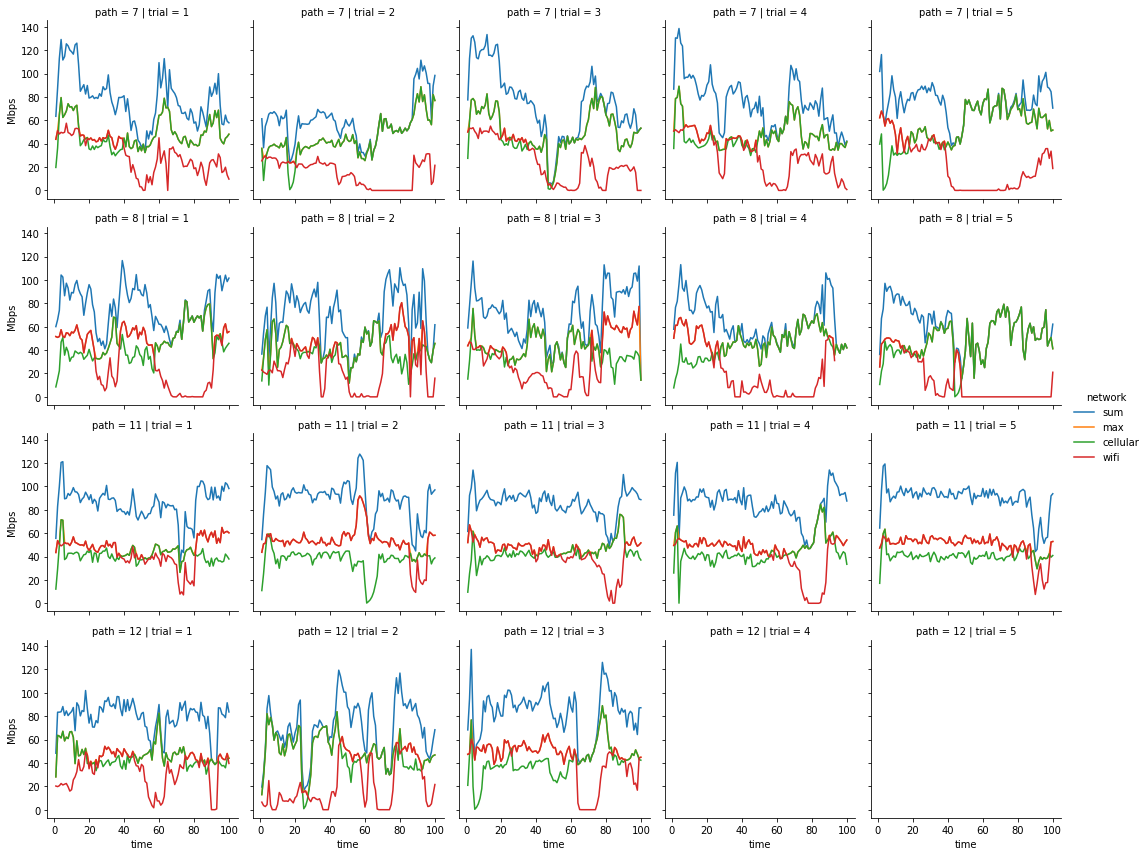

In [ ]:
#g=sns.FacetGrid(dfx, row='trial', col='path',hue="network")
g=sns.FacetGrid(dfall, row='path', col='trial',hue="network")
g.map(sns.lineplot,'time', 'Mbps')
g.add_legend()


### basic stats per (path, network, trial)

In [ ]:
dfall.groupby(['path', 'network']).agg({'Mbps': ['mean', 'std']})

Mbps           
                    mean        std
path network                       
7    cellular  48.020498  16.190886
     max       50.190781  14.592062
     sum       72.385556  22.776105
     wifi      24.365058  17.959469
8    cellular  43.070411  14.036778
     max       49.164415  12.466822
     sum       68.105725  20.618388
     wifi      25.442393  22.579834
11   cellular  41.200719   8.965438
     max       50.873911   8.026399
     sum       86.973786  13.773002
     wifi      45.773067  14.226116
12   cellular  44.751152  13.966536
     max       50.463528  11.048508
     sum       77.470055  19.846080
     wifi      32.718903  19.698114

In [ ]:
dfall.groupby(['path', 'trial', 'network']).agg({'Mbps': ['mean', 'std']})

Mbps           
                          mean        std
path trial network                       
7    1     cellular  47.435461  13.163552
           max       49.398108  11.714448
           sum       77.888631  21.939264
           wifi      30.453170  15.171299
     2     cellular  44.148416  16.361198
...                        ...        ...
12   2     wifi      22.144153  20.484751
     3     cellular  40.714820  14.387869
           max       51.907165   9.173108
           sum       83.047302  19.451817
           wifi      42.332482  17.907463

[72 rows x 2 columns]

### autocorrelation functions per path and trial

In [ ]:
np_arr = []
for name, group in dfall.groupby(['path', 'trial', 'network']):
  mn = group['Mbps'].mean()
  st = group['Mbps'].std()
  cf = np.where(acf(group['Mbps'],fft=False ) > 0.15)[0].max()
  if name[2]=="cellular":
    nt = 0 
  elif name[2]=="wifi":
    nt = 1 
  elif name[2]=="sum":
    nt = 2
  elif name[2]=="max":
    nt = 3 
  np_arr = np.append(np_arr, [name[0], name[1], nt,  mn, st, cf] )
  #summary_dat = pd.concat([summary_dat, tr.stack()], axis=0)
summary_dat =   pd.DataFrame(np_arr.reshape(int(len(np_arr)/6),6), columns = ['path', 'trial', 'network', 'mean', 'std', 'ac'])

In [ ]:
summary_dat

path  trial  network       mean        std    ac
0    7.0    1.0      0.0  47.435461  13.163552   6.0
1    7.0    1.0      3.0  49.398108  11.714448   6.0
2    7.0    1.0      2.0  77.888631  21.939264   9.0
3    7.0    1.0      1.0  30.453170  15.171299  17.0
4    7.0    2.0      0.0  44.148416  16.361198  22.0
..   ...    ...      ...        ...        ...   ...
67  12.0    2.0      1.0  22.144153  20.484751  37.0
68  12.0    3.0      0.0  40.714820  14.387869   7.0
69  12.0    3.0      3.0  51.907165   9.173108  34.0
70  12.0    3.0      2.0  83.047302  19.451817   4.0
71  12.0    3.0      1.0  42.332482  17.907463  10.0

[72 rows x 6 columns]

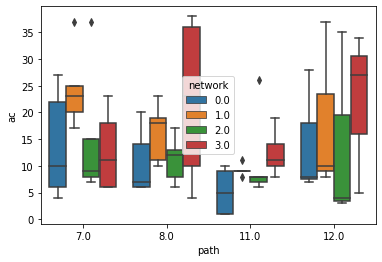

In [ ]:
sns.boxplot(data=summary_dat, x='path', y='ac',  hue='network');


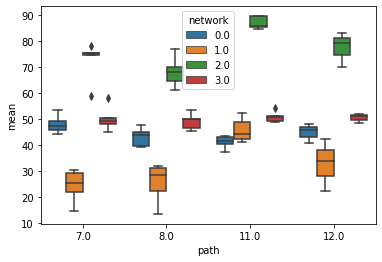

In [ ]:
sns.boxplot(data=summary_dat, x='path', y='mean',  hue='network');

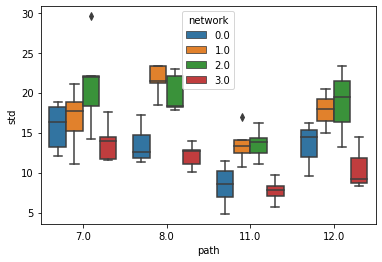

In [ ]:
sns.boxplot(data=summary_dat, x='path', y='std',  hue='network');

## Load in data: single path single trial


In [ ]:
# configure data location, path 7
config="2021-08-03-16:15:28.pcap-PROCESSED"
csvFolder='http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/'+ config+ '/' #use ending /


csvFiles=['2__1628021915.734065000__172.58.227.147__57472__199.109.64.50__80.pcap.csv', # 2__ (cellular) and 4__ (wifi) is for trial 1
		      '4__1628021929.021405000__192.42.55.21__39728__199.109.64.50__80.pcap.csv']

In [ ]:
# read in cellular data
csvFileFull = csvFolder+csvFiles[0] # cell link
print(csvFileFull)
df1 = pd.read_csv(csvFileFull, header=None)
df1.columns=['time1','cellular']
df1

http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-03-16:15:28.pcap-PROCESSED/2__1628021915.734065000__172.58.227.147__57472__199.109.64.50__80.pcap.csv


time1  cellular
0        1   2459130
1        2   4547534
2        3   8087024
3        4   9932444
4        5   7808374
..     ...       ...
110    111   7824908
111    112   8646604
112    113   9560746
113    114   8602176
114    115   8999494

[115 rows x 2 columns]

In [ ]:
# read in WiFi data
print(csvFileFull)
csvFileFull= csvFolder+csvFiles[1] # wiFi link
df2 = pd.read_csv(csvFileFull, header=None)
df2.columns=['time2','wifi']
df2

http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-03-16:15:28.pcap-PROCESSED/2__1628021915.734065000__172.58.227.147__57472__199.109.64.50__80.pcap.csv


time2     wifi
0        1  5471526
1        2  6403158
2        3  6037344
3        4  6215400
4        5  6144156
..     ...      ...
369    370  1898640
370    371  2494062
371    372  1604430
372    373  1324692
373    374  2308068

[374 rows x 2 columns]

In [ ]:
# combine cellular and wifi data
df = pd.DataFrame(None)
df['time']=df1['time1'][0:100]
df['cellular']=(8/10**6)* df1['cellular'][0:100]
df['wifi']=(8/10**6)* df2['wifi'][0:100] 
df

time   cellular       wifi
0      1  19.673040  43.772208
1      2  36.380272  51.225264
2      3  64.696192  48.298752
3      4  79.459552  49.723200
4      5  62.466992  49.153248
..   ...        ...        ...
95    96  41.541888  15.311664
96    97  39.830544  16.363584
97    98  44.595344  19.881072
98    99  46.000432  13.185648
99   100  48.134080   9.714240

[100 rows x 3 columns]

## Look at data: single path single trial

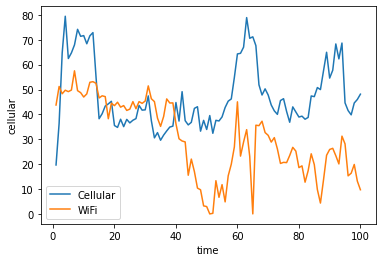

In [ ]:
sns.lineplot(x=df['time'], y=df['cellular'], label='Cellular');
sns.lineplot(x=df['time'], y=df['wifi'], label='WiFi');

In [ ]:
df.describe()

time    cellular        wifi
count  100.000000  100.000000  100.000000
mean    50.500000   47.435461   30.453170
std     29.011492   13.163552   15.171299
min      1.000000   19.673040    0.000000
25%     25.750000   37.648396   19.703808
50%     50.500000   43.484936   29.762928
75%     75.250000   54.932536   44.692848
max    100.000000   79.459552   57.523968

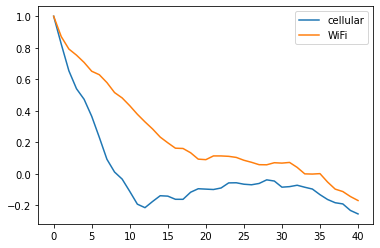

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

sns.lineplot(x=np.arange(41), y=acf(df['cellular'],fft=False ), label='cellular');
sns.lineplot(x=np.arange(41), y=acf(df['wifi'], fft=False ), label='WiFi');

## Compute Pearson R

In [ ]:
dfwide = dfsingle.pivot_table(values='Mbps', index=['path', 'trial', 'time'], columns='network').reset_index()
dfwide

network  path  trial  time   cellular       wifi
0           7      1     1  19.673040  43.772208
1           7      1     2  36.380272  51.225264
2           7      1     3  64.696192  48.298752
3           7      1     4  79.459552  49.723200
4           7      1     5  62.466992  49.153248
...       ...    ...   ...        ...        ...
1795       12      3    96  46.421984  21.696192
1796       12      3    97  51.244096  22.789008
1797       12      3    98  47.620368  16.696080
1798       12      3    99  42.911680  44.260272
1799       12      3   100  42.368864  44.886096

[1800 rows x 5 columns]

In [ ]:
for i, d in dfwide.groupby(['path', 'trial']):
  s = stats.pearsonr(d.dropna()['wifi'], d.dropna()['cellular'])   
  print(i, s[0])

(7, 1) 0.19499423234541421
(7, 2) -0.14484570556004667
(7, 3) 0.27075077312589896
(7, 4) 0.06956190618949602
(7, 5) -0.7512243779119502
(8, 1) -0.6258577038482098
(8, 2) -0.14893328589059468
(8, 3) -0.24126157391622494
(8, 4) -0.6431069083142887
(8, 5) -0.5021733420008252
(11, 1) -0.05881881176439004
(11, 2) -0.14778312335539004
(11, 3) -0.564342495104965
(11, 4) -0.5515436621381377
(11, 5) 0.1668506286374135
(12, 1) -0.4885647229935085
(12, 2) -0.20789035741407816
(12, 3) -0.2897626688900892


In [ ]:
stats.pearsonr(df['wifi'], df['cellular'])    

(0.19499423234541421, 0.05187954564113501)

Pandas computed Pearson r: -0.000942
Scipy computed Pearson r: 0.195 and p-value: 0.0519


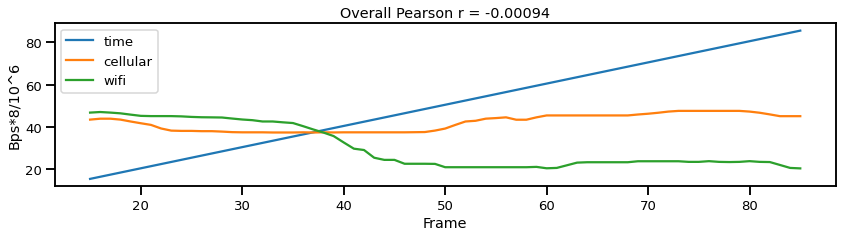

In [ ]:
#ilknur: just calculating the pearson coffient and p value for a single path and trial
#reference: https://colab.research.google.com/gist/jcheong0428/c68c60fe4ee8d9e794a5423552344569/synchrony_tutorial.ipynb#scrollTo=wEmlcs_M0Su0

sns.set_context('talk',font_scale=.8)



overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r:.3g}")

r, p = stats.pearsonr(df.dropna()['cellular'], df.dropna()['wifi'])
print(f"Scipy computed Pearson r: {r:.3g} and p-value: {p:.3g}")
f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=30,center=True).median().plot(ax=ax) # ???? check about the window parameter
ax.set(xlabel='Frame',ylabel='Bps*8/10^6',title=f"Overall Pearson r = {overall_pearson_r:.2g}");


http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-17:55:46.pcap-PROCESSED/2__1628719235.540466000__172.58.230.250__41498__199.109.64.50__80.pcap.csv
   time1  cellular
0      1   3511370
1      2   7957974
2      3   7868100
3      4   7674450
4      5   8390502
http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/2021-08-11-17:55:46.pcap-PROCESSED/2__1628719235.540466000__172.58.230.250__41498__199.109.64.50__80.pcap.csv
   time2     wifi
0      1  2532630
1      2  2471310
2      3  2566854
3      4  2800854
4      5  2646104
    cellular       wifi
0  28.090960  20.261040
1  63.663792  19.770480
2  62.944800  20.534832
3  61.395600  22.406832
4  67.124016  21.168832
Pandas computed Pearson r: -0.553
Scipy computed Pearson r: -0.553 and p-value: 2.28e-13


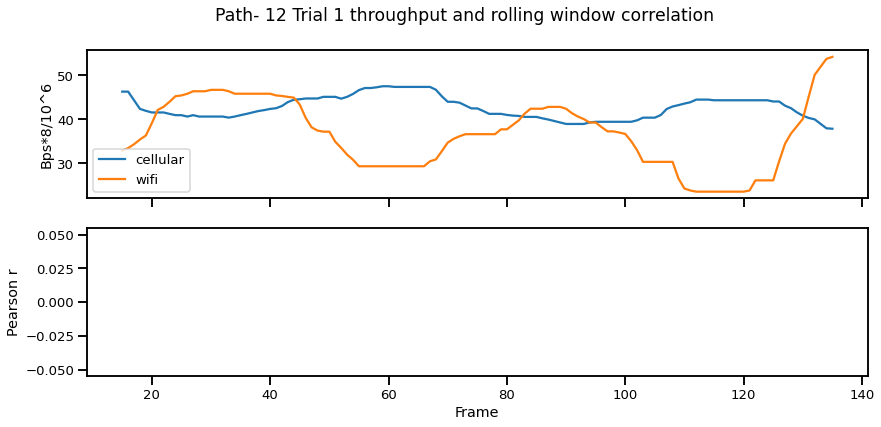

In [ ]:
#ilknur: calculating pearson coeffient, p value and rolling window correlation for one path and one trial
#reference: https://colab.research.google.com/gist/jcheong0428/c68c60fe4ee8d9e794a5423552344569/synchrony_tutorial.ipynb#scrollTo=wEmlcs_M0Su0

sns.set_context('talk',font_scale=.8)


################### Read in data for path 12
config="2021-08-11-17:55:46.pcap-PROCESSED"
csvFolder='http://webserver.webserver-aydini.ch-geni-net.instageni.nysernet.org/mpTraceFiles/'+ config+ '/' #use ending /


#path 12 trial 1
csvFiles=['2__1628719235.540466000__172.58.230.250__41498__199.109.64.50__80.pcap.csv',
          '3__1628719238.303378000__192.42.55.21__7615__199.109.64.50__80.pcap.csv']

csvFileFull = csvFolder+csvFiles[0] # cell link
print(csvFileFull)
df1 = pd.read_csv(csvFileFull, header=None)
df1.columns=['time1','cellular']
print(df1.head(5))


print(csvFileFull)
csvFileFull= csvFolder+csvFiles[1] # wiFi link
df2 = pd.read_csv(csvFileFull, header=None)
df2.columns=['time2','wifi']
print(df2.head(5))

df = pd.DataFrame(None)
df['cellular']=df1['cellular']
df['wifi']=df2['wifi']
df=df*8/10**6
print(df.head(5))

overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r:.3g}")

r, p = stats.pearsonr(df.dropna()['cellular'], df.dropna()['wifi'])
print(f"Scipy computed Pearson r: {r:.3g} and p-value: {p:.3g}")

# ???????????Set window size to compute moving window synchrony.
r_window_size = 1
# Interpolate missing data.
df_interpolated = df #df.interpolate() # ???? should we skip this step
# Compute rolling window synchrony
rolling_r=df_interpolated['cellular'].rolling(window=r_window_size, center=True).corr(df_interpolated['wifi'])

f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Bps*8/10^6')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Path- 12 Trial 1 throughput and rolling window correlation")
plt.show()

## Ilknur: playing with python, pandas, seaborn 

In [ ]:
# ilknur playing with ypthon, pandas, etc.
df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)
df.columns=["NameXX","AgeX", "SexX"]
print(df)


In [ ]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [10., 20., 30., 40.]})
df
df.groupby('Max Speed').agg({'Max Speed': ['sum','mean', 'std']})